## Importing Libraries

In [78]:
from textblob import TextBlob
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Declaring Sample Text

In [79]:
text = """Your response times are frequently slow.
You don’t resolve customer issues effectively.
You rely too heavily on macros / scripted responses.
You don’t express enough empathy in tickets.
You use an inappropriate tone when dealing with upset customers.
Your tone in written communication can be too formal.
You are trash
You are too lazy
You are useless
I am angry
"""

## Getting Sentiment of the sentence (negative, neutral, positive)

In [80]:
blob = TextBlob(text)
senti = blob.sentiment.polarity

if senti < 0:
    sentiment = 'negative'
elif senti > 0:
    sentiment = 'positive'
else:
    sentiment = 'netural'

## Getting Emotion of sentence

In [81]:
# classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
# output = classifier(text)

# high_score = 0
# emotion = ''

# for dict in output[0]:
#     if dict['score'] > high_score:
#         high_score = dict['score']
#         emotion = dict['label']
#     else:
#         continue

## Model with more emotions

In [82]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

model_outputs = classifier(text)

high_score_1 = model_outputs[0][0]['score']
emotion_1 = model_outputs[0][0]['label']

## Plotting Graph

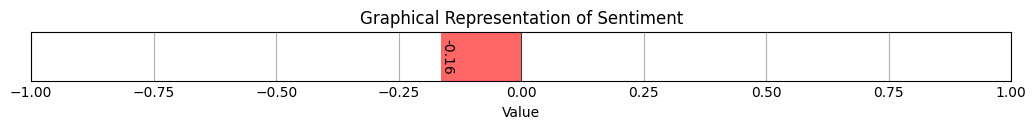

In [83]:
if sentiment == 'positive':
    col = "#b3d23e"
elif sentiment == 'negative':
    col = "#FF6666"

fig, ax = plt.subplots(figsize=(10, 0.5))
ax.barh(y=0, width=senti, height=2, color=col)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.grid(True)

ax.axvline(0, color='black', linewidth=0.5)

ax.set_title('Graphical Representation of Sentiment')
ax.set_xlabel('Value')
ax.get_yaxis().set_visible(False)

ax.text(senti, 0, f'{senti:.2f}', color='black', va='center', rotation=90 if senti > 0 else 270, ha='left' if senti < 0 else 'right')
plt.show()

C:\Users\ABTBb\AppData\Local\Temp\ipykernel_52328\336350976.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graphValue, y=graphEmotions, palette='viridis')


Text(0.5, 1.0, 'Emotion Distribution')

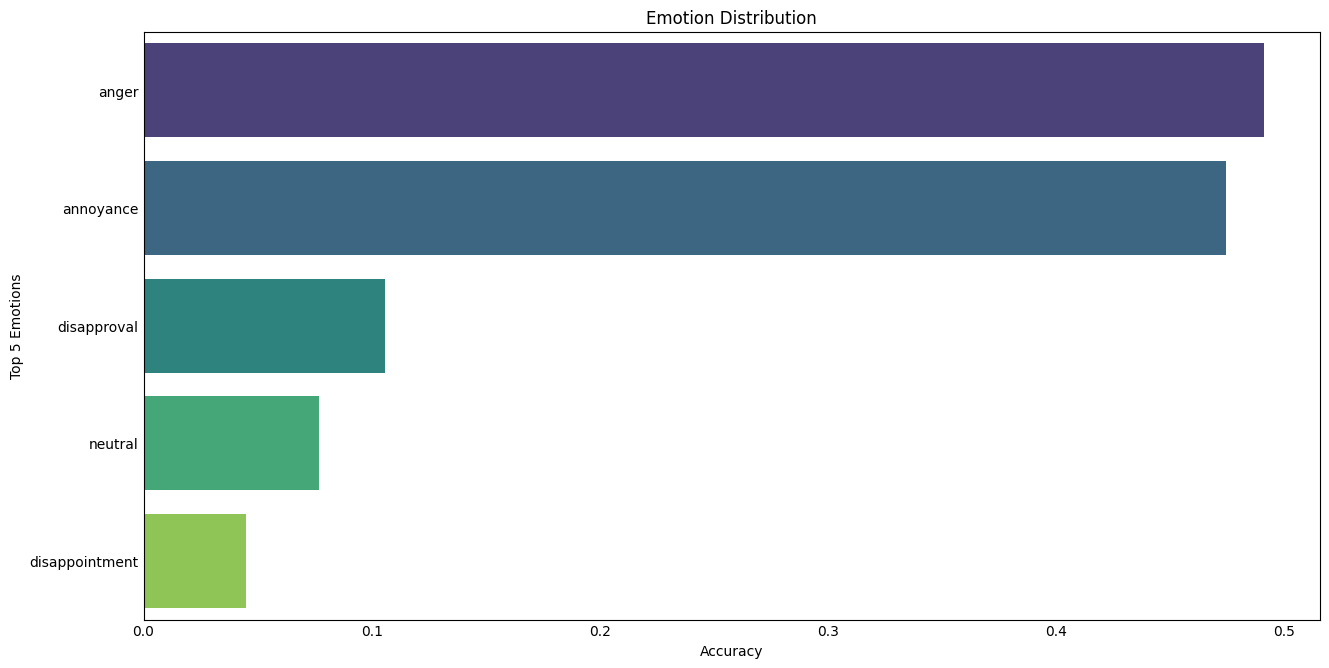

In [84]:
emotion_scores = {output['label']: output['score'] for output in model_outputs[0]}
# emotion_labels = list(emotion_scores.keys())
# emotion_values = list(emotion_scores.values())

# graphEmotions = [emotion_labels[i] for i in range(5)]
# graphEmotions = emotion_labels[:5]
graphEmotions = list(emotion_scores.keys())[:5]
graphValue = list(emotion_scores.values())[:5]

plt.figure(figsize=(12, 6))
sns.barplot(x=graphValue, y=graphEmotions, palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Top 5 Emotions')
plt.title('Emotion Distribution')

## Output

In [85]:
print("Sentiment =", sentiment, senti)
print("Emotion =", emotion_1)

Sentiment = negative -0.1642857142857143
Emotion = anger


## Text to speech

In [86]:
import pyttsx3
engine = pyttsx3.init()
engine.say(f'The above paragraph is {sentiment}')
engine.say(f'The emotion in the above paragraph is {emotion_1}')
engine.runAndWait()

## Summary

In [95]:
summarizer = pipeline("summarization", model="philschmid/bart-large-cnn-samsum")

conversation = '''This is absolutely unacceptable. I cannot believe the sheer incompetence and disregard for customer satisfaction displayed by your company. After waiting on hold for an infuriating amount of time, I was met with a representative who was clearly indifferent to my problem. Their dismissive attitude only fueled my frustration. It's as if they couldn't care less about resolving the issue. I am appalled by the lack of empathy and professionalism. This is not how customers should be treated. I am beyond disappointed and will not hesitate to share my negative experience with everyone I know. This is a complete and utter failure on your part.                                          
'''
summarizer(conversation)[0]['summary_text']

'After waiting on hold for an infuriating amount of time, I was met with a representative who was clearly indifferent to my problem. Their dismissive attitude only fueled my frustration. I am appalled by the lack of empathy and professionalism. This is not how customers should be treated. '